## Observations and Insights 

Observations:

- There is a high positive correlation (0.84) between mouse weight and average tumor volume.
- On average, mice that underwent Capomulin and Ramicane treatment had lower final tumor volumes than mice treated with Infubinol and Ceftamin -- in fact, tumor volume increased over the course of 45 days for mice treated with Infubinol and Ceftamin while tumor volumes decreased for mice treated with Capomulin and Ramicane.
- Capomulin and Ramicane had the highest number of datapoints -- presumably because the fewest number of mice died over the course of 45 days during observation while undergoing treatment by these two drugs.


In [439]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how='outer')
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [317]:
# Checking the number of mice in the DataFrame.
combined_df["Mouse ID"].value_counts()

g989    13
e584    10
m601    10
o287    10
t718    10
        ..
t573     1
v199     1
n482     1
u153     1
x336     1
Name: Mouse ID, Length: 249, dtype: int64

In [318]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
combined_df.duplicated(subset=['Mouse ID','Timepoint'], keep='first')


0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [319]:
# Optional: Get all the data for the duplicate mouse ID. 


In [320]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = combined_df.drop_duplicates(subset=['Mouse ID','Timepoint'],keep='first')
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [321]:
# Checking the number of mice in the clean DataFrame.

clean_df['Mouse ID'].nunique()


249

## Summary Statistics

In [322]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

rt_df = clean_df.groupby('Drug Regimen')
average_size = rt_df['Tumor Volume (mm3)'].mean()
median_size = rt_df['Tumor Volume (mm3)'].median()
variance_of_size = rt_df['Tumor Volume (mm3)'].var()
stdev_of_size = variance_of_size ** 0.5
SEM_of_size = stdev_of_size / (rt_df['Mouse ID'].count() ** 0.5)

summary_df = pd.DataFrame({"Average Size":average_size,
                           "Median Size":median_size,
                           "Variance": variance_of_size,
                           "Standard Deviation": stdev_of_size,
                           "SEM": SEM_of_size})

summary_df

# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Average Size,Median Size,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

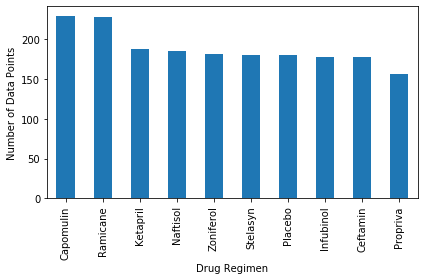

In [323]:
#Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

# Create a bar chart based off of the group series from before
mouse_count = rt_df['Mouse ID'].count().sort_values(ascending =False)
count_chart = mouse_count.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Data Points")


plt.tight_layout()


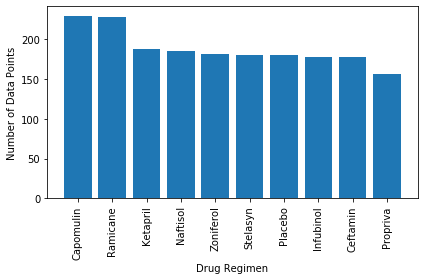

In [324]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(mouse_count))
plt.bar(x_axis, mouse_count, align = "center")
plt.xticks(x_axis, mouse_count.index, rotation = 90)

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.tight_layout()

## Pie Plots

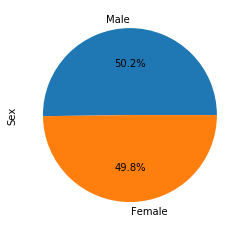

In [325]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df = clean_df.drop_duplicates(subset=['Mouse ID','Sex'],keep='first')
gender_groups = gender_df.groupby("Sex")
mouse_count = gender_groups['Sex'].count().sort_values(ascending =False)
count_chart = mouse_count.plot(kind='pie', autopct='%1.1f%%')

Text(0, 0.5, 'Sex')

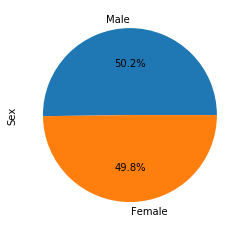

In [326]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mouse_count.values, labels=mouse_count.index, autopct='%1.1f%%')
plt.ylabel('Sex')


## Quartiles, Outliers and Boxplots

In [526]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Capomulin, Ramicane, Infubinol, Ceftamin


#Filter out df to keep only last Timepoint for each Mouse ID
final_tumor_volume_df = clean_df.drop_duplicates(subset=['Mouse ID'],keep='last')


filtered_df = final_tumor_volume_df.loc[(final_tumor_volume_df["Drug Regimen"]=="Capomulin") | 
                                        (final_tumor_volume_df["Drug Regimen"]=="Ramicane") |
                                        (final_tumor_volume_df["Drug Regimen"]=="Infubinol") |
                                        (final_tumor_volume_df["Drug Regimen"]=="Ceftamin"),:]

most_promising_groups_df = filtered_df.groupby("Drug Regimen")
quartiles = most_promising_groups_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
quartiles = quartiles.unstack(level=-1)

potential_outliers = ['']

lowerq = quartiles[0.25]
upperq = quartiles[0.75]
IQR = upperq-lowerq

lower_bound = lowerq - (1.5*IQR)
upper_bound = upperq + (1.5*IQR)


iqr_df = pd.DataFrame({"Lower Bound":lower_bound,
                       "Upper Bound":upper_bound,
                       "IQR": IQR})

combined_df = pd.merge(filtered_df, iqr_df, how='outer', on = 'Drug Regimen')

# Tumor Volume (mm3) Outliers for Capomulin, Ramicane, Infubinol, Ceftamin


infubinol_outliers = combined_df.loc[(combined_df["Drug Regimen"]=='Infubinol') &
                                     ((combined_df["Tumor Volume (mm3)"]<combined_df["Lower Bound"]) | 
                                      (combined_df["Tumor Volume (mm3)"]>combined_df["Upper Bound"])),:]
infubinol_outliers = infubinol_outliers[["Mouse ID","Tumor Volume (mm3)"]]

capomulin_outliers = combined_df.loc[(combined_df["Drug Regimen"]=='Capomulin') &
                                     ((combined_df["Tumor Volume (mm3)"]<combined_df["Lower Bound"]) | 
                                      (combined_df["Tumor Volume (mm3)"]>combined_df["Upper Bound"])),:]
capomulin_outliers = capomulin_outliers[["Mouse ID","Tumor Volume (mm3)"]]

ramicane_outliers = combined_df.loc[(combined_df["Drug Regimen"]=='Ramicane') &
                                     ((combined_df["Tumor Volume (mm3)"]<combined_df["Lower Bound"]) | 
                                      (combined_df["Tumor Volume (mm3)"]>combined_df["Upper Bound"])),:]
ramicane_outliers = ramicane_outliers[["Mouse ID","Tumor Volume (mm3)"]]

ceftamin_outliers = combined_df.loc[(combined_df["Drug Regimen"]=='Ceftamin') &
                                     ((combined_df["Tumor Volume (mm3)"]<combined_df["Lower Bound"]) | 
                                      (combined_df["Tumor Volume (mm3)"]>combined_df["Upper Bound"])),:]
ceftamin_outliers = ceftamin_outliers[["Mouse ID","Tumor Volume (mm3)"]]

print(f'Capomulin potential outliers:\n{capomulin_outliers}')
print(f'Ramicane potential outliers:\n{ramicane_outliers}')
print(f'Ceftamin potential outliers:\n{ceftamin_outliers}')
print(f'Infubinol potential outliers:\n{infubinol_outliers}')

Capomulin potential outliers:
Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []
Ramicane potential outliers:
Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []
Ceftamin potential outliers:
Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []
Infubinol potential outliers:
   Mouse ID  Tumor Volume (mm3)
25     c326           36.321346


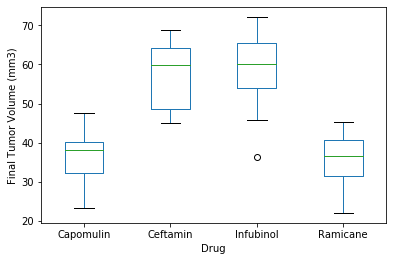

In [355]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

filtered_df.boxplot(by='Drug Regimen', column = 'Tumor Volume (mm3)')
plt.title('')
plt.suptitle('')
plt.xlabel("Drug")
plt.ylabel("Final Tumor Volume (mm3)")
plt.grid(False)
plt.show()


## Line and Scatter Plots

<function matplotlib.pyplot.show(*args, **kw)>

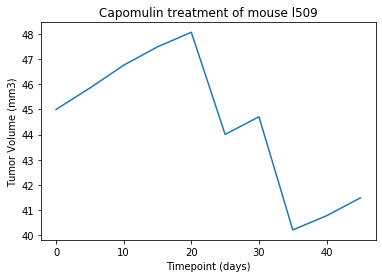

In [469]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Get rows where Mouse ID = l509

mouse_only = clean_df.loc[clean_df["Mouse ID"]=="l509",:]

#Plot Tumor Volume versus Timepoint for Mouse l509

mouse_only.plot(x='Timepoint', y='Tumor Volume (mm3)', kind ='line', legend = None)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.show


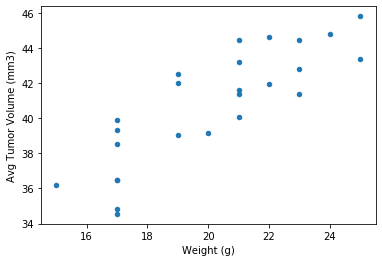

In [452]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Get data for only mice treated with Capomulin
capomulin_only = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin",:]

per_mouse = capomulin_only.groupby('Mouse ID')
avg_tumor_size=per_mouse['Tumor Volume (mm3)'].mean()
avg_tumor_size=pd.DataFrame(avg_tumor_size)
avg_tumor_size = avg_tumor_size.rename(columns={"Tumor Volume (mm3)":"Avg Tumor Volume (mm3)"})

remove_duplicates = capomulin_only.drop_duplicates(subset=['Mouse ID','Weight (g)'], keep='first')

combined_df = pd.merge(avg_tumor_size, remove_duplicates, how='outer', on = 'Mouse ID')

combined_df.plot(x='Weight (g)', y = 'Avg Tumor Volume (mm3)', kind = 'scatter', legend = None)


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


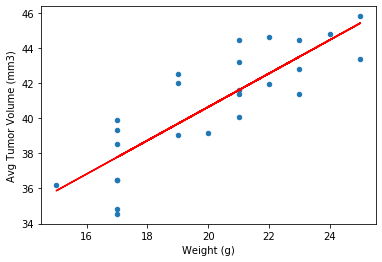

In [453]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = combined_df['Weight (g)']
y_values = combined_df['Avg Tumor Volume (mm3)']

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
combined_df.plot(x='Weight (g)', y = 'Avg Tumor Volume (mm3)', kind = 'scatter', legend = None)
plt.plot(x_values,regress_values,"r-")
plt.show()

